## Empresa de Logística e Transporte

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('logistica.csv')

In [3]:
df.head()

,ID do Pedido,Data de Envio,Data de Entrega,Custo de Envio,Peso do Produto (kg),Distância Percorrida (km),Status da Entrega,Modal de Transporte,Tempo de Entrega (dias),Situação da Entrega
0,1,2025-02-14,2025-02-14,10.129674,1.737406,549.352849,Entregue,Ferroviário,0,No prazo
1,2,2025-03-25,2025-03-31,90.181164,15.478690,257.572779,Em trânsito,Aéreo,6,Atrasada
2,3,2025-04-10,2025-04-17,93.234725,22.654439,230.299356,Em trânsito,Rodoviário,7,Atrasada
3,4,2025-03-04,2025-03-08,61.654845,2.066821,581.967205,Entregue,Aéreo,4,Atrasada
4,5,2025-04-05,2025-04-07,44.413150,48.096682,742.635949,Entregue,Rodoviário,2,Atrasada


### 1. Qual é o custo médio de envio por modal de transporte?

In [4]:
custo_medio_modal = df.groupby('Modal de Transporte')['Custo de Envio'].mean().sort_values(ascending = False)
custo_medio_modal

Modal de Transporte
Marítimo       64.989402
Aéreo          61.252709
Rodoviário     53.505516
Ferroviário    50.160571
Name: Custo de Envio, dtype: float64

### 2. Qual é o custo total de envio por modal de transporte?

In [5]:
custo_total_modal = df.groupby('Modal de Transporte')['Custo de Envio'].sum().sort_values(ascending = False)
custo_total_modal

Modal de Transporte
Marítimo       1689.724463
Rodoviário     1391.143407
Aéreo          1347.559587
Ferroviário    1304.174840
Name: Custo de Envio, dtype: float64

### 3. Qual é o tempo médio de entrega por modal de transporte?

In [6]:
# Convertendo as datas para datetime se não estiverem no formato correto
df['Data de Envio'] = pd.to_datetime(df['Data de Envio'])
df['Data de Entrega'] = pd.to_datetime(df['Data de Entrega'])

# Calculando o tempo de entrega em dias
df['Tempo de Entrega (dias)'] = (df['Data de Entrega'] - df['Data de Envio']).dt.days

# Calculando o tempo médio de entrega por modal de transporte
tempo_medio_entrega = df.groupby('Modal de Transporte')['Tempo de Entrega (dias)'].mean().sort_values(ascending = False)
tempo_medio_entrega

Modal de Transporte
Ferroviário    4.961538
Aéreo          4.318182
Marítimo       4.230769
Rodoviário     3.730769
Name: Tempo de Entrega (dias), dtype: float64

### 4. Qual é o tempo médio de entrega por distância?

In [7]:
# Calculando o tempo médio de entrega por modal de transporte
tempo_medio_entrega = df.groupby('Distância Percorrida (km)')['Tempo de Entrega (dias)'].mean().sort_values(ascending = False)
tempo_medio_entrega

Distância Percorrida (km)
13.297403     10.0
278.845411    10.0
482.304874    10.0
356.571012    10.0
706.206778    10.0
              ... 
764.619362     0.0
842.351068     0.0
908.103474     0.0
971.517401     0.0
959.552633     0.0
Name: Tempo de Entrega (dias), Length: 100, dtype: float64

### 5. Qual é a porcentagem de entregas realizadas "No prazo" por modal de transporte?

In [8]:
# Criando a coluna 'Situação da Entrega' (caso ainda não tenha feito isso)
df['Situação da Entrega'] = np.where(df['Data de Entrega'] <= df['Data de Envio'], 'No prazo', 'Atrasada')

# Calcule o número total de entregas e o número de entregas "No prazo" por modal
entregas_no_prazo = df[df['Situação da Entrega'] == 'No prazo'].groupby('Modal de Transporte').size()
total_por_modal = df.groupby('Modal de Transporte').size()

# Calcule a porcentagem de entregas "No prazo"
porcentagem_no_prazo = (entregas_no_prazo / total_por_modal) * 100

# Exibindo o resultado
porcentagem_no_prazo

Modal de Transporte
Aéreo          27.272727
Ferroviário    19.230769
Marítimo       30.769231
Rodoviário     19.230769
dtype: float64

In [9]:
df.head()

,ID do Pedido,Data de Envio,Data de Entrega,Custo de Envio,Peso do Produto (kg),Distância Percorrida (km),Status da Entrega,Modal de Transporte,Tempo de Entrega (dias),Situação da Entrega
0,1,2025-02-14,2025-02-14,10.129674,1.737406,549.352849,Entregue,Ferroviário,0,No prazo
1,2,2025-03-25,2025-03-31,90.181164,15.478690,257.572779,Em trânsito,Aéreo,6,Atrasada
2,3,2025-04-10,2025-04-17,93.234725,22.654439,230.299356,Em trânsito,Rodoviário,7,Atrasada
3,4,2025-03-04,2025-03-08,61.654845,2.066821,581.967205,Entregue,Aéreo,4,Atrasada
4,5,2025-04-05,2025-04-07,44.413150,48.096682,742.635949,Entregue,Rodoviário,2,Atrasada


### 6. Qual é a porcentagem de entregas "Atrasadas" por status ou por tipo de produto?

In [10]:
# Criando a coluna 'Situação da Entrega' (caso ainda não tenha feito isso)
df['Situação da Entrega'] = np.where(df['Data de Entrega'] <= df['Data de Envio'], 'No prazo', 'Atrasada')

# Calcule o número total de entregas e o número de entregas "Atrasadas" por modal
entregas_atrasadas = df[df['Situação da Entrega'] == 'Atrasada'].groupby('Modal de Transporte').size()
total_por_modal = df.groupby('Modal de Transporte').size()

# Calcule a porcentagem de entregas "No prazo"
porcentagem_no_prazo = (entregas_atrasadas / total_por_modal) * 100

# Exibindo o resultado
porcentagem_no_prazo

Modal de Transporte
Aéreo          72.727273
Ferroviário    80.769231
Marítimo       69.230769
Rodoviário     80.769231
dtype: float64

### 7. Quais modais têm as maiores distâncias percorridas e como isso afeta os custos de envio?

In [11]:
analise_modal = df.groupby('Modal de Transporte').agg({
    'Distância Percorrida (km)': 'mean',  
    'Custo de Envio': 'mean'  
}).reset_index()

# Ordenando pela maior média de distância percorrida
analise_modal = analise_modal.sort_values(by='Distância Percorrida (km)', ascending=False)

# Exibindo o resultado
print(analise_modal)

  Modal de Transporte  Distância Percorrida (km)  Custo de Envio
2            Marítimo                 532.802152       64.989402
1         Ferroviário                 517.380480       50.160571
3          Rodoviário                 463.786981       53.505516
0               Aéreo                 424.798893       61.252709


### 8. Qual é o modal de transporte mais rápido?

In [12]:
analise_modal_rapidez = df.groupby('Modal de Transporte')['Tempo de Entrega (dias)'].sum()

# Ordenar os resultados para encontrar o modal com o menor tempo de entrega
modal_mais_rapido = analise_modal_rapidez.idxmin()

# Exibir o resultado
print(f"O modal de transporte mais rápido é: {modal_mais_rapido}")

O modal de transporte mais rápido é: Aéreo


### 9. Qual é o peso médio dos produtos por modal de transporte?

In [13]:
peso_medio = df.groupby('Modal de Transporte')['Peso do Produto (kg)'].mean()
peso_medio

Modal de Transporte
Aéreo          25.700584
Ferroviário    29.811368
Marítimo       30.290680
Rodoviário     24.103477
Name: Peso do Produto (kg), dtype: float64

### 10. Qual é a relação entre o peso dos produtos e o custo de envio?

In [14]:
# Calcular a correlação entre o 'Peso do Produto (kg)' e o 'Custo de Envio'
correlacao = df['Peso do Produto (kg)'].corr(df['Custo de Envio'])

# Exibir o valor da correlação
print(f"A correlação entre o peso do produto e o custo de envio é: {correlacao}")

A correlação entre o peso do produto e o custo de envio é: -0.04531409772645724


### 11. Como a distância percorrida impacta o custo de envio?

In [15]:
# Calcular a correlação entre a 'Distância Percorrida (km)' e o 'Custo de Envio'
correlacao_distancia_custo = df['Distância Percorrida (km)'].corr(df['Custo de Envio'])

# Exibir a correlação
print(f"A correlação entre a distância percorrida e o custo de envio é: {correlacao_distancia_custo}")

A correlação entre a distância percorrida e o custo de envio é: -0.07025553132077673


#### Uma correlação de -0.0703 é muito próxima de 0 e, como é negativa, indica uma relação muito fraca e negativa entre a distância percorrida e o custo de envio. Ou seja, o custo de envio pode ser afetado por muitos outros fatores, como o modal de transporte, tipo de produto, serviços adicionais (como seguro), taxas fixas de transporte, entre outros. Esses fatores podem ter mais impacto no custo de envio do que a distância percorrida.

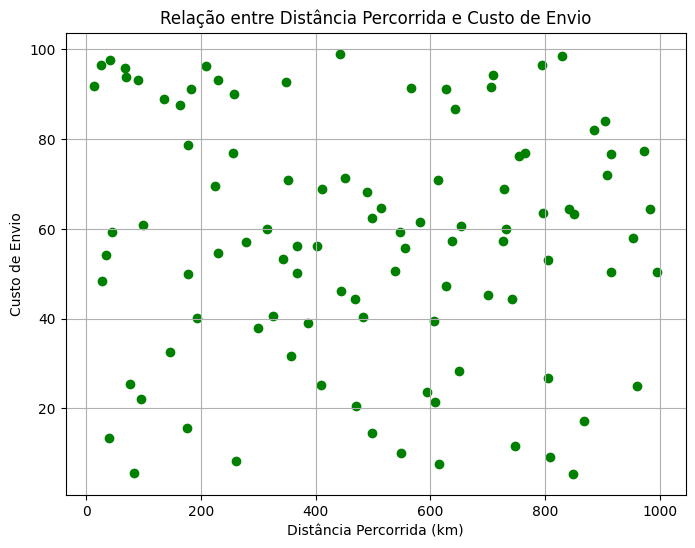

In [16]:
import matplotlib.pyplot as plt

# Criando o gráfico de dispersão (scatter plot)
plt.figure(figsize=(8,6))
plt.scatter(df['Distância Percorrida (km)'], df['Custo de Envio'], color='green')

# Adicionando título e rótulos
plt.title('Relação entre Distância Percorrida e Custo de Envio')
plt.xlabel('Distância Percorrida (km)')
plt.ylabel('Custo de Envio')

# Exibindo o gráfico
plt.grid(True)
plt.show()

### 12. Como a distância percorrida afeta a pontualidade das entregas?

In [17]:
# Calcular a correlação entre a 'Distância Percorrida (km)' e o 'Tempo de Entrega (dias)'
correlacao_distancia_tempo = df['Distância Percorrida (km)'].corr(df['Tempo de Entrega (dias)'])

# Exibir a correlação
print(f"A correlação entre a distância percorrida e o tempo de entrega é: {correlacao_distancia_tempo}")

A correlação entre a distância percorrida e o tempo de entrega é: 0.01452964584466246


#### A correlação de 0.0145 está muito próxima de 0, o que sugere que não há uma relação linear significativa entre a distância percorrida e o tempo de entrega no seu conjunto de dados. Ou seja, o tempo de entrega pode ser afetado por modal de transporte, condições das estradas, tipo de produto, volume de produtos, etc.

In [18]:
# Agrupar os dados pela 'Situação da Entrega' e calcular a média da 'Distância Percorrida (km)'
pontualidade_distancia = df.groupby('Situação da Entrega')['Distância Percorrida (km)'].mean()

# Exibir o resultado
print(pontualidade_distancia)

Situação da Entrega
Atrasada    489.824311
No prazo    478.422414
Name: Distância Percorrida (km), dtype: float64


### 13. Qual foi o desempenho das entregas ao longo do tempo?

In [19]:
# Converter 'Data de Envio' para datetime, caso ainda não tenha sido feito
df['Data de Envio'] = pd.to_datetime(df['Data de Envio'])

# Agrupar por mês e calcular a média de tempo de entrega
desempenho_mensal = df.groupby(df['Data de Envio'].dt.to_period('M')).agg({
    'Tempo de Entrega (dias)': 'mean',
    'Custo de Envio': 'mean'
}).reset_index()

# Exibir o desempenho mensal
desempenho_mensal

,Data de Envio,Tempo de Entrega (dias),Custo de Envio
0,2025-01,4.580645,55.570896
1,2025-02,4.400000,56.133533
2,2025-03,4.000000,54.478680
3,2025-04,4.294118,67.289184


### 14. Como o custo de envio evolui ao longo do tempo?

In [20]:
# Converter a coluna 'Data de Envio' para o formato datetime, caso não tenha sido feito
df['Data de Envio'] = pd.to_datetime(df['Data de Envio'])

# Agrupar por mês e calcular a média do custo de envio
custo_envio_mensal = df.groupby(df['Data de Envio'].dt.to_period('M')).agg({
    'Custo de Envio': 'mean'
}).reset_index()

# Exibir o custo de envio mensal
custo_envio_mensal

,Data de Envio,Custo de Envio
0,2025-01,55.570896
1,2025-02,56.133533
2,2025-03,54.478680
3,2025-04,67.289184


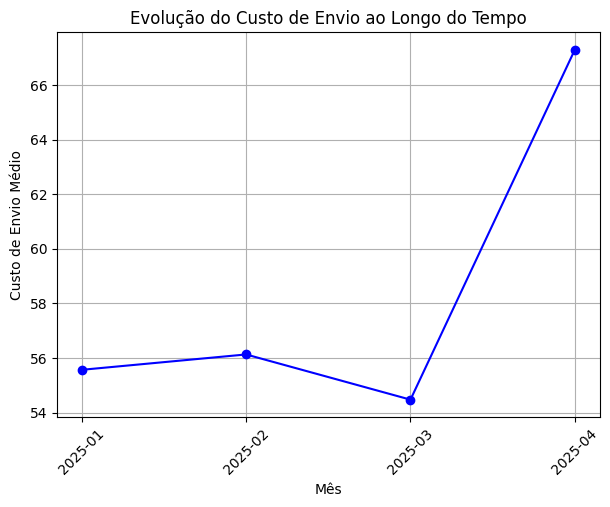

In [21]:
# Criar um gráfico para visualizar a evolução do custo de envio ao longo do tempo
plt.figure(figsize=(7,5))
plt.plot(custo_envio_mensal['Data de Envio'].astype(str), custo_envio_mensal['Custo de Envio'], marker='o', color='blue')

# Adicionar título e rótulos
plt.title('Evolução do Custo de Envio ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Custo de Envio Médio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 15. Qual é o número total de entregas realizadas "No prazo" e "Atrasadas"?

In [22]:
# Contar o número de entregas "No prazo" e "Atrasadas"
entregas_por_situacao = df['Situação da Entrega'].value_counts()

# Exibir o número de entregas em cada situação
print(entregas_por_situacao)

Situação da Entrega
Atrasada    76
No prazo    24
Name: count, dtype: int64


### 16. Qual é o tempo médio de atraso das entregas?

In [23]:
# Filtrar as entregas atrasadas (onde a Situação da Entrega é "Atrasada")
atrasadas = df[df['Situação da Entrega'] == 'Atrasada'].copy()  # Criar uma cópia explícita

# Calcular o tempo de atraso (tempo de entrega real - prazo esperado)
atrasadas['Atraso (dias)'] = atrasadas['Tempo de Entrega (dias)'] - atrasadas['Tempo de Entrega (dias)'].min()

# Calcular o tempo médio de atraso
tempo_medio_atraso = atrasadas['Atraso (dias)'].mean()

# Exibir o tempo médio de atraso
print(f'O tempo médio de atraso das entregas é: {tempo_medio_atraso:.2f} dias')

O tempo médio de atraso das entregas é: 4.67 dias


In [24]:
# Salvar o dataset
df.to_csv('logistica.csv', index = False)